Helmholtz analysis

In [ ]:
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import loadtxt
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import seaborn as sns

%matplotlib inline

In [2]:
# Helmoltz Resonance
def no_neck(v):
    V = v*1e-6
    R = 1* 0.5* 1e-2
    A = np.pi * R**2
    L = np.pi/2 * R
    vs = 343
    pi = np.pi
    return (vs/ (2*pi))*np.sqrt(A/(V*L))


In [3]:
def no_neck_v(v):
    V = v*1e-6
    R = 1* 0.5* 1e-2
    A = np.pi * R**2
    L = np.pi/2 * R
    vs = 331 + 0.6*-20
    pi = np.pi
    return (vs/ (2*pi))*np.sqrt(A/(V*L))

In [4]:
vs = 331 + 0.6*-20
vs

319.0

In [5]:
# Helmoltz Resonance with neck 
def neck(v):
    V = v*1e-6
    R = 0.005
    A = np.pi * R**2
    L = np.pi/2 * R
    vs = 343
    pi = np.pi
    return (vs/ (2*pi))*np.sqrt(A/(V*L))



In [6]:
#Helmholtz Frequency with Different Aperture
def aperture(d):
    V = 326*1e-6
    R = d* 0.5* 1e-2
    A = np.pi * R**2
    L =  (np.pi/2) * R
    vs = 331 + 0.6*10
    pi = np.pi
    return (vs/ (2*pi))*np.sqrt(A/(V*L))


In [7]:
def aperture_v(d):
    V = 326*1e-6
    R = d* 0.5* 1e-2
    A = np.pi * R**2
    L =  (np.pi/2) * R
    vs = 331 + 0.6*-40
    pi = np.pi
    return (vs/ (2*pi))*np.sqrt(A/(V*L))




In [8]:
vs = 331 + 0.6*20
vs

343.0

In [9]:
#gaussian and Gaussian fit
def gauss(x,H,A,xo, sigma):
    return H + A*np.exp(-(x-xo)**2/(2*sigma**2))

def gauss_fit(x,y):
    mean = sum(x*y)/sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2)/ sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y),mean, sigma])
    return popt

In [10]:
def w_per_mr(dB):
    I0 = 10e-12
    return I0*10**(dB/10)

In [11]:
#Data 
#volume 
v135 = pd.read_csv('v126.csv')
v120 = pd.read_csv('v141.csv')
v100 = pd.read_csv('v161.csv')
v77 = pd.read_csv('v184.csv')
v47 = pd.read_csv('v214.csv')
v31 = pd.read_csv('v230.csv')
v17 = pd.read_csv('v244.csv')
v5 = pd.read_csv('v256.csv')

#Data 2





In [12]:
frequency = v135["Frequency"]

In [13]:
print("v1 =", 261 - 126)
print("v1 =", 261 - 141)
print("v1 =", 261 - 161)
print("v1 =", 261 - 184)
print("v1 =", 261 - 214)
print("v1 =", 261 - 230)
print("v1 =", 261 - 244)
print("v1 =", 261 - 256)


v1 = 135
v1 = 120
v1 = 100
v1 = 77
v1 = 47
v1 = 31
v1 = 17
v1 = 5


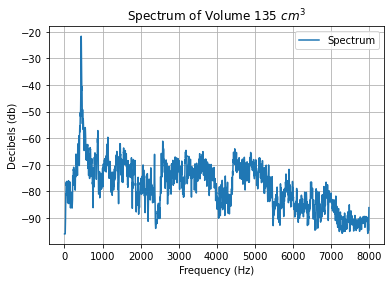

In [14]:
x = v135["Frequency"]
y = (v135[" Data"])
plt.plot(x,y, label = "Spectrum")
plt.title("Spectrum of Volume 135 $cm^{3}$")
plt.xlabel("Frequency (Hz)")
plt.ylabel('Decibels (db)')
plt.grid()
plt.legend()

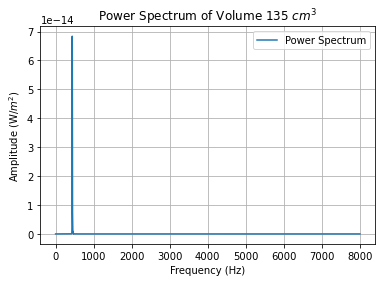

In [15]:
#After Linear Transformation
x = v135["Frequency"]
y = w_per_mr(v135[" Data"])


plt.plot(x,y, label = "Power Spectrum")
plt.title("Power Spectrum of Volume 135 $cm^{3}$")
plt.xlabel("Frequency (Hz)")
plt.ylabel('Amplitude (W/$m^{2}$)')
plt.grid()
plt.legend()


12.060815161401093

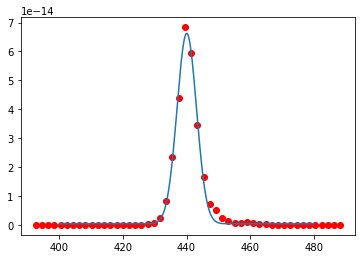

In [16]:
x = v135["Frequency"][200:250]
y = w_per_mr(v135[" Data"][200:250])

popt = gauss_fit(x,y)
x7x = np.linspace(400,480,1000)

plt.plot(x7x, gauss(x7x, *popt))

plt.scatter(x,y, color = "r")

fr_index = list(gauss(x,*popt)).index(np.max(gauss(x, *popt)))
fr_v135 = frequency[200 + fr_index]
fr_v135


maxi = np.max(gauss(x7x,*popt))

half_max_array = np.array([maxi/2]*len(x7x))

abs_vals = abs(np.array(gauss(x7x,*popt) - half_max_array))

min1 = np.min(abs_vals[0:fr_index])

min_index1 = list(abs_vals[0:fr_index]).index(min1)

min2 = np.min(abs_vals[fr_index:len(x7x)])

min_index2 = fr_index + list(abs_vals[fr_index:len(x7x)]).index(min2)

FWHM_135 = abs(x7x[min_index1]- x7x[min_index2])

q135 = fr_v135/FWHM_135

q135

In [17]:
print(maxi)

6.626159693896353e-14


In [18]:
mean = gauss_fit(x,y)
print(mean)

[4.05220254e-16 6.58564303e-14 4.40043947e+02 3.06095336e+00]


13.68884575076219

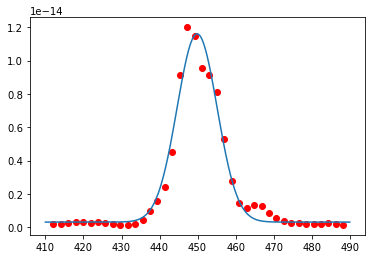

In [19]:
x2 = v120["Frequency"][210:250]
y2 = w_per_mr(v120[" Data"][210:250])

x1 = np.linspace(410,490, 2000)

popt = gauss_fit(x2,y2)

plt.plot(x1, gauss(x1, *popt))

plt.scatter(x2 , y2, color = "r")

fr_index = list(gauss(x2,*popt)).index(np.max(gauss(x2, *popt)))
fr_v120 = frequency[210 + fr_index]
fr_v120

maxi = np.max(gauss(x1,*popt))

half_max_array = np.array([maxi/2]*len(x1))

abs_vals = abs(np.array(gauss(x1,*popt) - half_max_array))

min1 = np.min(abs_vals[0:fr_index])

min_index1 = list(abs_vals[0:fr_index]).index(min1)

min2 = np.min(abs_vals[fr_index:len(x1)])

min_index2 = fr_index + list(abs_vals[fr_index:len(x1)]).index(min2)

FWHM_200 = abs(x1[min_index1]-x1[min_index2])

q200 = fr_v120 / FWHM_200

q200


In [20]:
sigma120 = gauss_fit(x3,y3)
print(sigma120)

NameError: name 'x3' is not defined

In [ ]:
x3 = v100["Frequency"][220:280]
y3 = w_per_mr(v100[" Data"][220:280])

x1 = np.linspace(440,540, 2000)

popt = gauss_fit(x3,y3)

plt.plot(x1, gauss(x1, *popt))

plt.scatter(x3 , y3, color = "r")

fr_index = list(gauss(x3,*popt)).index(np.max(gauss(x3, *popt)))
fr_v100 = frequency[220 + fr_index]
fr_v100


maxi = np.max(gauss(x1,*popt))

half_max_array = np.array([maxi/2]*len(x1))

abs_vals = abs(np.array(gauss(x1,*popt) - half_max_array))

min1 = np.min(abs_vals[0:fr_index])

min_index1 = list(abs_vals[0:fr_index]).index(min1)

min2 = np.min(abs_vals[fr_index:len(x1)])

min_index2 = fr_index + list(abs_vals[fr_index:len(x1)]).index(min2)

FWHM_200 = abs(x1[min_index1]-x1[min_index2])

q100 = fr_v100 / FWHM_200

q100


In [ ]:
sigma120 = gauss_fit(x7,y7)
print(sigma120)

In [ ]:
x4 = v77["Frequency"][260:300]
y4 = w_per_mr(v77[" Data"][260:300])
x1 = np.linspace(510,590, 2000)


popt = gauss_fit(x4,y4)

plt.plot(x1, gauss(x1, *popt), label = "Gaussian Fitting")

plt.scatter(x4 , y4, color = "r", label = "Observed Frequency")

fr_index = list(gauss(x4,*popt)).index(np.max(gauss(x4, *popt)))
fr_v77 = frequency[260 + fr_index]
fr_v77
plt.title("Volume $cm^{3}$")
plt.xlabel("Frequency (Hz)")
plt.ylabel('Amplitude (W/$m^{2}$)')
plt.grid()
plt.legend()
plt.tight_layout()

maxi = np.max(gauss(x1,*popt))

half_max_array = np.array([maxi/2]*len(x1))

abs_vals = abs(np.array(gauss(x1,*popt) - half_max_array))

min1 = np.min(abs_vals[0:fr_index])

min_index1 = list(abs_vals[0:fr_index]).index(min1)

min2 = np.min(abs_vals[fr_index:len(x1)])

min_index2 = fr_index + list(abs_vals[fr_index:len(x1)]).index(min2)

FWHM_200 = abs(x1[min_index1]-x1[min_index2])

q77 = fr_v77 / FWHM_200

q77





In [ ]:
x5 = v47["Frequency"][300:350]
y5 = w_per_mr(v47[" Data"][300:350])
x1 = np.linspace(600,680, 2000)

popt = gauss_fit(x5,y5)

plt.plot(x1, gauss(x1, *popt))

plt.scatter(x5 , y5, color = "r")

fr_index = list(gauss(x5,*popt)).index(np.max(gauss(x5, *popt)))
fr_v47 = frequency[300 + fr_index]
fr_v47

maxi = np.max(gauss(x1,*popt))

half_max_array = np.array([maxi/2]*len(x1))

abs_vals = abs(np.array(gauss(x1,*popt) - half_max_array))

min1 = np.min(abs_vals[0:fr_index])

min_index1 = list(abs_vals[0:fr_index]).index(min1)

min2 = np.min(abs_vals[fr_index:len(x1)])

min_index2 = fr_index + list(abs_vals[fr_index:len(x1)]).index(min2)

FWHM_200 = abs(x1[min_index1]-x1[min_index2])

q100 = fr_v47 / FWHM_200

q100


In [ ]:
sigma120 = gauss_fit(x5,y5)
print(sigma120)

In [ ]:
x6 = v31["Frequency"][375:500]
y6 = w_per_mr(v31[" Data"][375:500])

x1 = np.linspace(750,950, 2000)

popt = gauss_fit(x6,y6)

plt.plot(x6, gauss(x6, *popt))

plt.scatter(x6 , y6, color = "r")


fr_index = list(gauss(x6,*popt)).index(np.max(gauss(x6, *popt)))
fr_v31 = frequency[375 + fr_index]
fr_v31

maxi = np.max(gauss(x1,*popt))

half_max_array = np.array([maxi/2]*len(x1))

abs_vals = abs(np.array(gauss(x1,*popt) - half_max_array))

min1 = np.min(abs_vals[0:fr_index])

min_index1 = list(abs_vals[0:fr_index]).index(min1)

min2 = np.min(abs_vals[fr_index:len(x1)])

min_index2 = fr_index + list(abs_vals[fr_index:len(x1)]).index(min2)

FWHM_200 = abs(x1[min_index1]-x1[min_index2])

q31 = fr_v31 / FWHM_200

q31




In [ ]:
x7 = v17["Frequency"][480:510]
y7 = w_per_mr(v17[" Data"][480:510])

x = np.linspace(940,990,1000)

popt = gauss_fit(x7,y7)

plt.plot(x7x, gauss(x7x, *popt))

plt.scatter(x7 , y7, color = "r") 

fr_index = list(gauss(x7,*popt)).index(np.max(gauss(x7, *popt)))
fr_v17 = frequency[480 + fr_index]
fr_v17


maxi = np.max(gauss(x1,*popt))

half_max_array = np.array([maxi/2]*len(x1))

abs_vals = abs(np.array(gauss(x1,*popt) - half_max_array))

min1 = np.min(abs_vals[0:fr_index])

min_index1 = list(abs_vals[0:fr_index]).index(min1)

min2 = np.min(abs_vals[fr_index:len(x1)])

min_index2 = fr_index + list(abs_vals[fr_index:len(x1)]).index(min2)

FWHM_200 = abs(x1[min_index1]-x1[min_index2])

q31 = fr_v31 / FWHM_200

q31


In [ ]:
sigma120 = gauss_fit(x7,y7)
print(sigma120)

In [ ]:
x8 = v5["Frequency"][950:1000]
y8 = w_per_mr(v5[" Data"][950:1000])

x1 = np.linspace(1860,1940,1000)

popt = gauss_fit(x8,y8)

plt.plot(x1, gauss(x1, *popt))

plt.scatter(x8 , y8, color = "r")

fr_index = list(gauss(x8,*popt)).index(np.max(gauss(x8, *popt)))
fr_v5 = frequency[950 + fr_index]
fr_v5


maxi = np.max(gauss(x1,*popt))

half_max_array = np.array([maxi/2]*len(x1))

abs_vals = abs(np.array(gauss(x1,*popt) - half_max_array))

min1 = np.min(abs_vals[0:fr_index])

min_index1 = list(abs_vals[0:fr_index]).index(min1)

min2 = np.min(abs_vals[fr_index:len(x1)])

min_index2 = fr_index + list(abs_vals[fr_index:len(x1)]).index(min2)

FWHM_200 = abs(x1[min_index1]-x1[min_index2])

q31 = fr_v5 / FWHM_200

q31


In [ ]:
sigma120 = gauss_fit(x8,y8)
print(sigma120)

In [ ]:
# Theoretical vs Observ

freq = np.array([fr_v135,fr_v120,fr_v100,fr_v77,fr_v47,fr_v31,fr_v17,fr_v5])
vol = np.array([135, 120, 100, 77 , 47 , 31, 17 , 5])
plt.scatter(vol, freq, color="r")
volx = np.linspace(5,140)

plt.plot(volx, no_neck(volx) )
plt.xlabel("Volume cm^3")
plt.ylabel("Resonant Frequency (Hz)")

plt.grid()
plt.tight_layout()
plt.legend()

In [ ]:
#aperture Data
#0.8cm data
cm08 = pd.read_csv('0.8cm.csv')
cm08_2 = pd.read_csv('0.8cm2.csv')
cm08_3 = pd.read_csv('0.8cm3.csv')
cm08_4 = pd.read_csv('0.8cm4.csv')
cm08_5 = pd.read_csv('0.8cm5.csv')

#1cm data
cm1 = pd.read_csv('1cm.csv')
cm1_2 = pd.read_csv('1cm2.csv')
cm1_3 = pd.read_csv('1cm3.csv')
cm1_4 = pd.read_csv('1cm4.csv')
cm1_5 = pd.read_csv('1cm5.csv')

#1.3cm data
cm13 = pd.read_csv('1.3cm.csv')
cm13_2 = pd.read_csv('1.3cm2.csv')
cm13_3 = pd.read_csv('1.3cm3.csv')
cm13_4 = pd.read_csv('1.3cm4.csv')
cm13_5 = pd.read_csv('1.3cm5.csv')

#1.6cm data
cm16 = pd.read_csv('1.6cm.csv')
cm16_2 = pd.read_csv('1.6cm2.csv')
cm16_3 = pd.read_csv('1.6cm3.csv')
cm16_4 = pd.read_csv('1.6cm4.csv')
cm16_5 = pd.read_csv('1.6cm5.csv')

#1.9cm data
cm19 = pd.read_csv('1.9cm.csv')
cm19_2 = pd.read_csv('1.9cm2.csv')
cm19_3 = pd.read_csv('1.9cm3.csv')
cm19_4 = pd.read_csv('1.9cm4.csv')
cm19_5 = pd.read_csv('1.9cm5.csv')

#2.2cm data
cm22 = pd.read_csv('2.2cm.csv')
cm22_2 = pd.read_csv('2.2cm2.csv')
cm22_2 = pd.read_csv('2.2cm2.csv')
cm22_2 = pd.read_csv('2.2cm2.csv')
cm22_2 = pd.read_csv('2.2cm2.csv')

#2.5cm data
cm25 = pd.read_csv('2.5cm.csv')
cm25_2 = pd.read_csv('2.5cm2.csv')
cm25_3 = pd.read_csv('2.5cm3.csv')
cm25_4 = pd.read_csv('2.5cm4.csv')
cm25_5 = pd.read_csv('2.5cm5.csv')

#2.7cm data
cm27 = pd.read_csv('2.7cm.csv')
cm27_2 = pd.read_csv('2.7cm2.csv')
cm27_3 = pd.read_csv('2.7cm3.csv')
cm27_4 = pd.read_csv('2.7cm4.csv')
cm27_5 = pd.read_csv('2.7cm5.csv')



In [ ]:
#0.8 cm
x = cm08_2["Frequency"][100:150]
y = w_per_mr(cm08_2[" Data"][100:150])

popt = gauss_fit(x,y)
x1 = np.linspace(200,280, 2000)

plt.plot(x1, gauss(x1, *popt), label = "Gaussian Fit")

plt.scatter(x,y, color = "r", label = "Observed Frequency")

fr_index = list(gauss(x,*popt)).index(np.max(gauss(x, *popt)))
fr_cm08 = frequency[100 + fr_index]
fr_cm08
plt.title("Aperture at 0.8 cm")
plt.xlabel("Frequency (Hz)")
plt.ylabel('Amplitude (W/$m^{2}$)')
plt.grid()
plt.legend()
plt.tight_layout()

maxi = np.max(gauss(x1,*popt))

half_max_array = np.array([maxi/2]*len(x1))

abs_vals = abs(np.array(gauss(x1,*popt) - half_max_array))

min1 = np.min(abs_vals[0:fr_index])

min_index1 = list(abs_vals[0:fr_index]).index(min1)

min2 = np.min(abs_vals[fr_index:len(x1)])

min_index2 = fr_index + list(abs_vals[fr_index:len(x1)]).index(min2)

FWHM_200 = abs(x1[min_index1]-x1[min_index2])

q31 = fr_cm08 / FWHM_200

q31



In [ ]:
#1cm
x = cm1["Frequency"][100:150]
y = w_per_mr(cm1[" Data"][100:150])

popt = gauss_fit(x,y)
x1 = np.linspace(200,280, 2000)

plt.plot(x1, gauss(x1, *popt))

plt.scatter(x,y, color = "r")

fr_index = list(gauss(x1,*popt)).index(np.max(gauss(x1, *popt)))
fr_cm1 = x1[fr_index]
fr_cm1

maxi = np.max(gauss(x1,*popt))

half_max_array = np.array([maxi/2]*len(x1))

abs_vals = abs(np.array(gauss(x1,*popt) - half_max_array))

min1 = np.min(abs_vals[0:fr_index])

min_index1 = list(abs_vals[0:fr_index]).index(min1)

min2 = np.min(abs_vals[fr_index:len(x1)])

min_index2 = fr_index + list(abs_vals[fr_index:len(x1)]).index(min2)

FWHM_200 = abs(x1[min_index1]-x1[min_index2])

q31 = fr_cm1 / FWHM_200

q31



In [ ]:
x_2 = cm1_2["Frequency"][120:150]
y_2 = w_per_mr(cm1_2[" Data"][120:150])

popt = gauss_fit(x_2,y_2)
x1 = np.linspace(220,300, 2000)

plt.plot(x1, gauss(x1, *popt))

plt.scatter(x_2,y_2, color="r")

fr_index = list(gauss(x_2,*popt)).index(np.max(gauss(x_2, *popt)))
fr_cm1_2 = frequency[120 + fr_index]
fr_cm1_2


maxi = np.max(gauss(x1,*popt))

half_max_array = np.array([maxi/2]*len(x1))

abs_vals = abs(np.array(gauss(x1,*popt) - half_max_array))

min1 = np.min(abs_vals[0:fr_index])

min_index1 = list(abs_vals[0:fr_index]).index(min1)

min2 = np.min(abs_vals[fr_index:len(x1)])

min_index2 = fr_index + list(abs_vals[fr_index:len(x1)]).index(min2)

FWHM_200 = abs(x1[min_index1]-x1[min_index2])

q31 = fr_cm1_2 / FWHM_200

q31


In [ ]:
#1cm
x_3 = cm1_3["Frequency"][100:150]
y_3 = w_per_mr(cm1_3[" Data"][100:150])

popt = gauss_fit(x_3,y_3)
cm1x = np.linspace(200,300, 2000)

plt.plot(cm1x, gauss(cm1x, *popt))

plt.scatter(x_3, y_3, color="r")

fr_index = list(gauss(cm1x,*popt)).index(np.max(gauss(cm1x, *popt)))
fr_cm1_3 = cm1x[fr_index]
fr_cm1_3
plt.grid()



In [ ]:
#1.3cm
x = cm13_2["Frequency"][135:160]
y = w_per_mr(cm13_2[" Data"][135:160])

popt = gauss_fit(x,y)
x1 = np.linspace(270,310, 2000)

plt.plot(x1, gauss(x1, *popt))
plt.scatter(x, y, color = 'r')

fr_index = list(gauss(x,*popt)).index(np.max(gauss(x, *popt)))
fr_cm13 = frequency[135+fr_index]
fr_cm13


maxi = np.max(gauss(x1,*popt))

half_max_array = np.array([maxi/2]*len(x1))

abs_vals = abs(np.array(gauss(x1,*popt) - half_max_array))

min1 = np.min(abs_vals[0:fr_index])

min_index1 = list(abs_vals[0:fr_index]).index(min1)

min2 = np.min(abs_vals[fr_index:len(x1)])

min_index2 = fr_index + list(abs_vals[fr_index:len(x1)]).index(min2)

FWHM_200 = abs(x1[min_index1]-x1[min_index2])

q31 = fr_cm13/ FWHM_200

q31


In [ ]:
#1.6cm
x = cm16_4["Frequency"][140:170]
y = w_per_mr(cm16_4[" Data"][140:170])

popt = gauss_fit(x,y)
x1 = np.linspace(275,330, 2000)

plt.plot(cm1x, gauss(cm1x, *popt))
plt.scatter(x, y, color ='r')

fr_index = list(gauss(x,*popt)).index(np.max(gauss(x, *popt)))
fr_cm16 = frequency[140 + fr_index]
fr_cm16

maxi = np.max(gauss(x1,*popt))

half_max_array = np.array([maxi/2]*len(x1))

abs_vals = abs(np.array(gauss(x1,*popt) - half_max_array))

min1 = np.min(abs_vals[0:fr_index])

min_index1 = list(abs_vals[0:fr_index]).index(min1)

min2 = np.min(abs_vals[fr_index:len(x1)])

min_index2 = fr_index + list(abs_vals[fr_index:len(x1)]).index(min2)

FWHM_200 = abs(x1[min_index1]-x1[min_index2])

q31 = fr_cm16/ FWHM_200

q31


In [ ]:
#1.9cm
x = cm19["Frequency"][140:170]
y = w_per_mr(cm19[" Data"][140:170])

popt = gauss_fit(x,y)
x1 = np.linspace(270,330, 2000)

plt.plot(cm1x, gauss(cm1x, *popt))
plt.scatter(x, y, color = "r")

fr_index = list(gauss(x,*popt)).index(np.max(gauss(x, *popt)))
#fr_cm19 =  frequency[140 + fr_index]
fr_cm19 = 330


maxi = np.max(gauss(x1,*popt))

half_max_array = np.array([maxi/2]*len(x1))

abs_vals = abs(np.array(gauss(x1,*popt) - half_max_array))

min1 = np.min(abs_vals[0:fr_index])

min_index1 = list(abs_vals[0:fr_index]).index(min1)

min2 = np.min(abs_vals[fr_index:len(x1)])

min_index2 = fr_index + list(abs_vals[fr_index:len(x1)]).index(min2)

FWHM_200 = abs(x1[min_index1]-x1[min_index2])

q31 = fr_cm19/ FWHM_200

q31


In [ ]:
#2.2cm
x = cm22["Frequency"][180:210]
y = w_per_mr(cm22[" Data"][180:210])

popt = gauss_fit(x,y)
cm1x = np.linspace(360,410, 2000)

plt.plot(cm1x, gauss(cm1x, *popt))
plt.scatter(x, y, color = "r")

fr_index = list(gauss(cm1x,*popt)).index(np.max(gauss(cm1x, *popt)))
fr_cm22 = cm1x[fr_index]
fr_cm22

maxi = np.max(gauss(cm1x,*popt))

half_max_array = np.array([maxi/2]*len(x1))

abs_vals = abs(np.array(gauss(cm1x,*popt) - half_max_array))

min1 = np.min(abs_vals[0:fr_index])

min_index1 = list(abs_vals[0:fr_index]).index(min1)

min2 = np.min(abs_vals[fr_index:len(x1)])

min_index2 = fr_index + list(abs_vals[fr_index:len(x1)]).index(min2)

FWHM_200 = abs(x1[min_index1]-x1[min_index2])

q31 = fr_cm22/ FWHM_200

q31


In [ ]:
#2.5cm
x = cm25["Frequency"][190:220]
y = w_per_mr(cm25[" Data"][190:220])

popt = gauss_fit(x,y)
x1 = np.linspace(380,420, 2000)

plt.plot(x1, gauss(x1, *popt))
plt.scatter(x, y, color = "r")
fr_index = list(gauss(cm1x,*popt)).index(np.max(gauss(cm1x, *popt)))
fr_cm25 = cm1x[fr_index]
fr_cm25

maxi = np.max(gauss(x1,*popt))

half_max_array = np.array([maxi/2]*len(x1))

abs_vals = abs(np.array(gauss(x1,*popt) - half_max_array))

min1 = np.min(abs_vals[0:fr_index])

min_index1 = list(abs_vals[0:fr_index]).index(min1)

min2 = np.min(abs_vals[fr_index:len(x1)])

min_index2 = fr_index + list(abs_vals[fr_index:len(x1)]).index(min2)

FWHM_200 = abs(x1[min_index1]-x1[min_index2])

q31 = fr_cm25/ FWHM_200

q31


In [ ]:
#2.7cm
x = cm27_4["Frequency"][200:222]
y = w_per_mr(cm27_4[" Data"][200:222])

popt = gauss_fit(x,y)
x1 = np.linspace(400,435, 2000)

plt.plot(cm1x, gauss(cm1x, *popt))
plt.scatter(x, y, color = "r")
fr_index = list(gauss(cm1x,*popt)).index(np.max(gauss(cm1x, *popt)))
fr_cm27 = cm1x[fr_index]
fr_cm27

maxi = np.max(gauss(x1,*popt))

half_max_array = np.array([maxi/2]*len(x1))

abs_vals = abs(np.array(gauss(x1,*popt) - half_max_array))

min1 = np.min(abs_vals[0:fr_index])

min_index1 = list(abs_vals[0:fr_index]).index(min1)

min2 = np.min(abs_vals[fr_index:len(x1)])

min_index2 = fr_index + list(abs_vals[fr_index:len(x1)]).index(min2)

FWHM_200 = abs(x1[min_index1]-x1[min_index2])

q31 = fr_cm27/ FWHM_200

q31


In [ ]:
#Aparteure 
apr_err08 = abs(aperture(0.9)- aperture(0.7))/2
apr_err1 = abs(aperture(1.1)- aperture(0.9))/2
apr_err13 = abs(aperture(1.4)- aperture(1.2))/2
apr_err16 = abs(aperture(1.7)- aperture(1.5))/2
apr_err19 = abs(aperture(2.0)- aperture(1.8))/2
apr_err22 = abs(aperture(2.3)- aperture(2.1))/2
apr_err25 = abs(aperture(2.6)- aperture(2.4))/2
apr_err27 = abs(aperture(2.8)- aperture(2.6))/2

In [ ]:
#changes of Volume
freq = np.array([fr_v135,fr_v120,fr_v100,fr_v77,fr_v47,fr_v31,fr_v17,fr_v5])
vol = np.array([135, 120, 100, 77 , 47 , 31, 17 , 5])
plt.scatter(vol, freq, label = "Low Volume with no Neck")
volx = np.linspace(5,135)
errors = np.array([v_135_err, v_120_err,v_100_err,v_77_err,v_47_err, v_31_err, v_17_err, v_5_err])

plt.errorbar(vol, freq, errors, ls ="None", color="r")
plt.plot(volx, no_neck(volx))
plt.ylim(250, 2000)
plt.xlabel("Volume Cm^3")
plt.ylabel("Resonant Frequency (Hz)")
plt.grid()

In [ ]:
freq_cm = np.array([fr_cm08, fr_cm1_3, fr_cm13,fr_cm16,fr_cm19, fr_cm22,fr_cm25, fr_cm27])
ap = np.array([0.8,1,1.3,1.6,1.9,2.2,2.5,2.7])
plt.scatter(ap, freq_cm, label = "Apertures")
apert = np.linspace(0.8,2.7,2000)
err = np.array([apr_err08,apr_err1,apr_err13,apr_err16,apr_err19,apr_err22, apr_err25,apr_err27])

plt.plot(apert, aperture(apert), color ="black")
plt.errorbar(ap, freq_cm, err, ls ="None", color="blue")

plt.grid()
plt.xlabel("Aperture Diameter cm")
plt.ylabel("Resonant Frequency (Hz)")

plt.tight_layout()

In [ ]:
# Volume errors +/- 0.05 cm^3 in volume
vol_err135 = abs (no_neck(135 + 0.05) -no_neck(135 -0.05))/2
vol_err120 = abs (no_neck(120 + 0.05) -no_neck(120 -0.05))/2
vol_err100 = abs (no_neck(100 + 0.05) -no_neck(100 -0.05))/2
vol_err77 = abs (no_neck(77 + 0.05) -no_neck(77 -0.05))/2
vol_err47 = abs (no_neck(47 + 0.05) -no_neck(47 -0.05))/2
vol_err31 = abs (no_neck(31 + 0.05) -no_neck(31 -0.05))/2
vol_err17= abs (no_neck(17 + 0.05) -no_neck(17 -0.05))/2
vol_err5 = abs (no_neck(5 + 0.05) -no_neck(5 -0.05))/2


In [ ]:
#Aparteure 
apr_err08 = abs(aperture(0.9)- aperture(0.7))/2
apr_err1 = abs(aperture(1.1)- aperture(0.9))/2
apr_err13 = abs(aperture(1.4)- aperture(1.2))/2
apr_err16 = abs(aperture(1.7)- aperture(1.5))/2
apr_err19 = abs(aperture(2.0)- aperture(1.8))/2
apr_err22 = abs(aperture(2.3)- aperture(2.1))/2
apr_err25 = abs(aperture(2.6)- aperture(2.4))/2
apr_err27 = abs(aperture(2.8)- aperture(2.6))/2

In [ ]:
def df_dV(d,L,a,V):
   
    vs = 343
   
    d = d*1e-2
   
    L = L*1e-2
   
    V = V*1e-6
   
    pi = np.pi
   
    return -vs * d * (1/8) * (pi)**-0.5 * (L+a*d)**-1 * (1/ (np.sqrt(1 / ((L + a*d)*V))*V**2))

In [ ]:
def df_dd(d,L,a,V):
   
    vs = 343
   
    d = d*1e-2
   
    L = L*1e-2
   
    V = V*1e-6
   
    pi = np.pi
   
    return (vs * ((2*d)/(V*(a*d+L)) - (a*d**2)/(V*(a*d+L)**2)) /(8*pi**0.5*np.sqrt(d**2/(V*(a*d+L)))))

In [ ]:
def df_dL(d,L,a,V):
   
    vs = 343
   
    d = d*1e-2
   
    L = L*1e-2
   
    V = V*1e-6
   
    pi = np.pi
   
    return (-d*vs* 8**-1 *V**-1 *pi**-0.5 * (L + a*d)**-2 * (1/np.sqrt(1/(V*(L+a*d)))))

In [ ]:
#error in volume data 
vol_err = 5e-8
diam_err = 0.001
len_err = 0.001 

vol_135 = abs(df_dV(d=1, L=0, a=np.pi/4, V = 135)*vol_err)
vol_135stat_err = np.std(fr_v135)/np.sqrt(5)
v_135_diam_err = df_dd(d=1, L=0, a=np.pi/4, V = 135)*diam_err
v_135_err = np.sqrt(vol_135**2 + vol_135stat_err**2 + v_135_diam_err**2)

vol_120 = abs(df_dV(d=1, L=0, a=np.pi/4, V = 120)*vol_err)
vol_120stat_err = np.std(fr_v120)/np.sqrt(5)
v_120_diam_err = df_dd(d=1, L=0, a=np.pi/4, V = 120)*diam_err
v_120_err = np.sqrt(vol_120**2 + vol_120stat_err**2 + v_120_diam_err**2)

vol_100 = abs(df_dV(d=1, L=0, a=np.pi/4, V = 100)*vol_err)
vol_100stat_err = np.std(fr_v100)/np.sqrt(5)
v_100_diam_err = df_dd(d=1, L=0, a=np.pi/4, V = 100)*diam_err
v_100_err = np.sqrt(vol_100**2 + vol_100stat_err**2 + v_100_diam_err**2)

vol_77 = abs(df_dV(d=1, L=0, a=np.pi/4, V = 77)*vol_err)
vol_77stat_err = np.std(fr_v77)/np.sqrt(5)
v_77_diam_err = df_dd(d=1, L=0, a=np.pi/4, V = 77)*diam_err
v_77_err = np.sqrt(vol_77**2 + vol_77stat_err**2 + v_77_diam_err**2)

vol_47 = abs(df_dV(d=1, L=0, a=np.pi/4, V = 47)*vol_err)
vol_47stat_err = np.std(fr_v47)/np.sqrt(5)
v_47_diam_err = df_dd(d=1, L=0, a=np.pi/4, V = 47)*diam_err
v_47_err = np.sqrt(vol_47**2 + vol_47stat_err**2 + v_47_diam_err**2)

vol_31 = abs(df_dV(d=1, L=0, a=np.pi/4, V =31)*vol_err)
vol_31stat_err = np.std(fr_v31)/np.sqrt(5)
v_31_diam_err = df_dd(d=1, L=0, a=np.pi/4, V = 31)*diam_err
v_31_err = np.sqrt(vol_31**2 + vol_31stat_err**2 + v_31_diam_err**2)

vol_17 = abs(df_dV(d=1, L=0, a=np.pi/4, V =17)*vol_err)
vol_17stat_err = np.std(fr_v17)/np.sqrt(5)
v_17_diam_err = df_dd(d=1, L=0, a=np.pi/4, V = 17)*diam_err
v_17_err = np.sqrt(vol_17**2 + vol_17stat_err**2 + v_17_diam_err**2)

vol_5 = abs(df_dV(d=1, L=0, a=np.pi/4, V = 5)*vol_err)
vol_5stat_err = np.std(fr_v5)/np.sqrt(5)
v_5_diam_err = df_dd(d=1, L=0, a=np.pi/4, V = 31)*diam_err
v_5_err = np.sqrt(vol_5**2 + vol_5stat_err**2 + v_5_diam_err**2)

print(v_135_err, v_120_err,v_100_err,v_77_err,v_47_err, v_31_err, v_17_err, v_5_err)


In [ ]:
#error in aperture data 
vol_err = 5e-8
diam_err = 0.001
len_err = 0.001 

apr_err08  = abs(df_dV(d= 0.8, L=0, a=np.pi/4, V = 326)*vol_err)
apr_08stat_err = np.std(fr_cm08)/np.sqrt(5)
apr_08diam_err = df_dd(d= 0.8, L=0, a=np.pi/4, V = 326)*diam_err
apr_08_err = np.sqrt(apr_err08**2 + apr_08stat_err**2 + apr_08diam_err**2)

apr_err1  = abs(df_dV(d= 1, L=0, a=np.pi/4, V = 326)*vol_err)
apr_1stat_err = np.std(fr_cm1_3)/np.sqrt(5)
apr_1diam_err = df_dd(d= 1, L=0, a=np.pi/4, V = 326)*diam_err
apr_1_err = np.sqrt(apr_err1**2 + apr_1stat_err**2 + apr_1diam_err**2)

apr_err13  = abs(df_dV(d= 1.3 , L=0, a=np.pi/4, V = 326)*vol_err)
apr_13stat_err = np.std(fr_cm13)/np.sqrt(5)
apr_13diam_err = df_dd(d= 1.3, L=0, a=np.pi/4, V = 326)*diam_err
apr_13_err = np.sqrt(apr_err13**2 + apr_13stat_err**2 + apr_13diam_err**2)

apr_err16  = abs(df_dV(d= 1.6 , L=0, a=np.pi/4, V = 326)*vol_err)
apr_16stat_err = np.std(fr_cm16)/np.sqrt(5)
apr_16diam_err = df_dd(d= 1.6, L=0, a=np.pi/4, V = 326)*diam_err
apr_16_err = np.sqrt(apr_err16**2 + apr_16stat_err**2 + apr_16diam_err**2)

apr_err19  = abs(df_dV(d= 1.9 , L=0, a=np.pi/4, V = 326)*vol_err)
apr_19stat_err = np.std(fr_cm19)/np.sqrt(5)
apr_19diam_err = df_dd(d= 1.9, L=0, a=np.pi/4, V = 326)*diam_err
apr_19_err = np.sqrt(apr_err19**2 + apr_19stat_err**2 + apr_19diam_err**2)

apr_err22  = abs(df_dV(d= 2.2 , L=0, a=np.pi/4, V = 326)*vol_err)
apr_22stat_err = np.std(fr_cm22)/np.sqrt(5)
apr_22diam_err = df_dd(d= 2.2, L=0, a=np.pi/4, V = 326)*diam_err
apr_22_err = np.sqrt(apr_err22**2 + apr_22stat_err**2 + apr_22diam_err**2)

apr_err25  = abs(df_dV(d= 2.5 , L=0, a=np.pi/4, V = 326)*vol_err)
apr_25stat_err = np.std(fr_cm25)/np.sqrt(5)
apr_25diam_err = df_dd(d= 2.5, L=0, a=np.pi/4, V = 326)*diam_err
apr_25_err = np.sqrt(apr_err25**2 + apr_25stat_err**2 + apr_25diam_err**2)

apr_err27  = abs(df_dV(d= 2.7 , L=0, a=np.pi/4, V = 326)*vol_err)
apr_27stat_err = np.std(fr_cm27)/np.sqrt(5)
apr_27diam_err = df_dd(d= 2.7, L=0, a=np.pi/4, V = 326)*diam_err
apr_27_err = np.sqrt(apr_err27**2 + apr_27stat_err**2 + apr_27diam_err**2)

print(apr_08_err, apr_1_err, apr_13_err,apr_16_err,apr_19_err,apr_22_err,apr_25_err,apr_27_err)

In [ ]:
#changes of Volume
freq = np.array([fr_v135,fr_v120,fr_v100,fr_v77,fr_v47,fr_v31,fr_v17,fr_v5])
vol = np.array([135, 120, 100, 77 , 47 , 31, 17 , 5])
plt.scatter(vol, freq, label = " Resonant Frequency measurement ", color = 'r')
volx = np.linspace(5,135)
errors = np.array([v_135_err, v_120_err,v_100_err,v_77_err,v_47_err, v_31_err, v_17_err, v_5_err])

plt.errorbar(vol, freq, errors, ls ="None", color="r")
plt.plot(volx, no_neck(volx), label = "Theoretical Fit")
plt.plot(volx, no_neck_v(volx), label = "Temperature at -20$c^{0}$")
plt.ylim(250, 2000)
plt.xlabel("Volume ($cm^{3}$)")
plt.ylabel("Resonant Frequency (Hz)")
plt.grid()
plt.tight_layout()
plt.legend()

In [ ]:
v_17_err

In [ ]:
#variation in aperture
freq_cm = np.array([fr_cm08, fr_cm1_3, fr_cm13,fr_cm16,fr_cm19, fr_cm22,fr_cm25, fr_cm27])
ap = np.array([0.8,1,1.3,1.6,1.9,2.2,2.5,2.7])
plt.scatter(ap, freq_cm, label = "Resonance measurement", color = "red")
apert = np.linspace(0.8,2.7,2000)
err = np.array([apr_08_err, apr_1_err, apr_13_err,apr_16_err,apr_19_err,apr_22_err,apr_25_err,apr_27_err])

plt.plot(apert, aperture(apert), label = "Theoretical Fit")
plt.plot(apert, aperture_v(apert), label = "Temperature at -40$c^{o}$")
plt.errorbar(ap, freq_cm, err, ls ="None", color="red")

plt.grid()

plt.xlabel("Aperture Diameter (cm)")
plt.ylabel("Resonant Frequency (Hz)")
plt.legend()
plt.tight_layout()

In [ ]:
# Calibration Data 
hz200 = pd.read_csv('hz200.csv')
hz300 = pd.read_csv('hz300.csv')
hz400 = pd.read_csv('hz400.csv')
hz500 = pd.read_csv('hz500.csv')
hz600 = pd.read_csv('hz600.csv')
hz700 = pd.read_csv('hz700.csv')
hz800 = pd.read_csv('hz800.csv')
hz900 = pd.read_csv('hz900.csv')

In [ ]:
#graphs
x = hz200["Frequency"][90:110]
y = w_per_mr(hz200[" Data"][90:110])

popt = gauss_fit(x,y)
xmx = np.linspace(180,215,2000)

plt.plot(x, gauss(x, *popt))
plt.scatter(x, y, color = "r")
plt.xlabel("Frequency (Hz)")
plt.ylabel(" Amplitude")
plt.title('Calibration Graph at 200 Hz')
fr_index = list(gauss(x,*popt)).index(np.max(gauss(x, *popt)))
fr_hz200 = frequency[90 + fr_index]
fr_hz200



In [ ]:
plt.tight_layout()


x2 = hz300["Frequency"][140:160]
y2 = w_per_mr(hz300[" Data"][140:160])

popt = gauss_fit(x2,y2)
x2mx = np.linspace(180,215,2000)

plt.plot(x2, gauss(x2, *popt))
plt.scatter(x2, y2, color = "r")
plt.xlabel("Frequency (Hz)")
plt.ylabel(" Amplitude")
plt.title('Calibration Graph at 300 Hz')

fr_index = list(gauss(x2,*popt)).index(np.max(gauss(x2, *popt)))
fr_hz300 = frequency[140 + fr_index]
fr_hz300




In [ ]:
x2 = hz400["Frequency"][190:220]
y2 = w_per_mr(hz400[" Data"][190:220])

popt = gauss_fit(x2,y2)
x2mx = np.linspace(180,215,2000)

plt.plot(x2, gauss(x2, *popt))
plt.scatter(x2, y2, color = "r")
plt.xlabel("Frequency (Hz)")
plt.ylabel(" Amplitude")
plt.title('Calibration Graph at 400 Hz')

fr_index = list(gauss(x2,*popt)).index(np.max(gauss(x2, *popt)))
fr_hz400 = frequency[190 + fr_index]
fr_hz400

In [ ]:
x2 = hz500["Frequency"][240:260]
y2 = w_per_mr(hz500[" Data"][240:260])

popt = gauss_fit(x2,y2)
x2mx = np.linspace(180,215,2000)

plt.plot(x2, gauss(x2, *popt))
plt.scatter(x2, y2, color = "r")
plt.xlabel("Frequency (Hz)")
plt.ylabel(" Amplitude")
plt.title('Calibration Graph at 500 Hz')

fr_index = list(gauss(x2,*popt)).index(np.max(gauss(x2, *popt)))
fr_hz500 = frequency[240 + fr_index]
fr_hz500

In [ ]:
x2 = hz600["Frequency"][290:320]
y2 = w_per_mr(hz600[" Data"][290:320])

popt = gauss_fit(x2,y2)
x2mx = np.linspace(180,215,2000)

plt.plot(x2, gauss(x2, *popt))
plt.scatter(x2, y2, color = "r")
plt.xlabel("Frequency (Hz)")
plt.ylabel(" Amplitude")
plt.title('Calibration Graph at 600 Hz')

fr_index = list(gauss(x2,*popt)).index(np.max(gauss(x2, *popt)))
fr_hz600 = frequency[290 + fr_index]
fr_hz600

In [ ]:
x2 = hz700["Frequency"][350:370]
y2 = w_per_mr(hz700[" Data"][350:370])

popt = gauss_fit(x2,y2)
x2mx = np.linspace(180,215,2000)

plt.plot(x2, gauss(x2, *popt))
plt.scatter(x2, y2, color = "r")
plt.xlabel("Frequency (Hz)")
plt.ylabel(" Amplitude")
plt.title('Calibration Graph at 700 Hz')

fr_index = list(gauss(x2,*popt)).index(np.max(gauss(x2, *popt)))
fr_hz700 = frequency[350 + fr_index]
fr_hz700

In [ ]:
x2 = hz800["Frequency"][395:420]
y2 = w_per_mr(hz800[" Data"][395:420])

popt = gauss_fit(x2,y2)
x2mx = np.linspace(180,215,2000)

plt.plot(x2, gauss(x2, *popt))
plt.scatter(x2, y2, color = "r")
plt.xlabel("Frequency (Hz)")
plt.ylabel(" Amplitude")
plt.title('Calibration Graph at 800 Hz')

fr_index = list(gauss(x2,*popt)).index(np.max(gauss(x2, *popt)))
fr_hz800 = frequency[395 + fr_index]
fr_hz800

In [ ]:
x2 = hz900["Frequency"][440:470]
y2 = w_per_mr(hz900[" Data"][440:470])

popt = gauss_fit(x2,y2)
x2mx = np.linspace(860,920,2000)

plt.plot(x2mx, gauss(x2mx, *popt), label = "Gaussian Fit")
plt.scatter(x2, y2, color = "r", label = "Observed Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel(" Amplitude (W/$m^{2}$)")
plt.title('Calibration Graph at 900 Hz')
plt.tight_layout()
plt.grid()
plt.legend()

fr_index = list(gauss(x2,*popt)).index(np.max(gauss(x2, *popt)))
fr_hz900 = frequency[440 + fr_index]
fr_hz900

In [ ]:
freqs = np.array([fr_hz200, fr_hz300, fr_hz400, fr_hz500, fr_hz600, fr_hz700, fr_hz800, fr_hz900])
actual = np.array([200,300,400,500,600,700,800,900])

errrs = abs(actual-freqs)/freqs
errrs

In [ ]:
(fr_hz500 - 500)

In [ ]:
def chi2(obvals, expvals, errors, dof):
    unsummed = []
    for i in np.arange(len(obvals)):
        unsummed.append((obvals[i] - expvals[i])**2 / errors[i]**2)
    return sum(unsummed)/dof

In [ ]:
#chi 2 for volume data
chi2(freq, no_neck(vol), errors , 7)

In [ ]:
chi2(freq_cm,aperture(ap), err , 7)